# Part 2: Dataset Split and EDA

# Import Necessary Libraries

In [1]:
# System
import pathlib
import glob
import os, os.path, shutil
# Data Exploration
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
# Show the image path
data_CORROSION_dir = 'data/CORROSION/'
data_NOCORROSION_dir = 'data/NOCORROSION/'
new_dir = 'split/'

In [3]:
# Create objects that stores all the relevant images
images_CORROSION = [file for file in os.listdir(data_CORROSION_dir) if file.endswith('.jpg')]
images_NOCORROSION = [file for file in os.listdir(data_NOCORROSION_dir) if file.endswith('.jpg')]

In [4]:
# See how many images there in NORMAL directory and PNEUMONIA directory
print('There are', len(images_CORROSION), 'NORMAL images')
print('There are', len(images_NOCORROSION), 'PNEUMONIA images')

There are 990 NORMAL images
There are 829 PNEUMONIA images


Text(0, 0.5, 'Numer of Images')

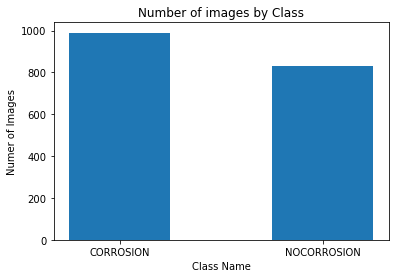

In [7]:
#Plot number of classes to identify imbalances
number_classes = {'CORROSION':990,
                  'NOCORROSION':829}
plt.bar(number_classes.keys(), number_classes.values(), width = 0.5)
plt.title("Number of images by Class")
plt.xlabel("Class Name")
plt.ylabel("Numer of Images")

Text(0.5, 1.0, 'Corrosion vs NoCorrosion')

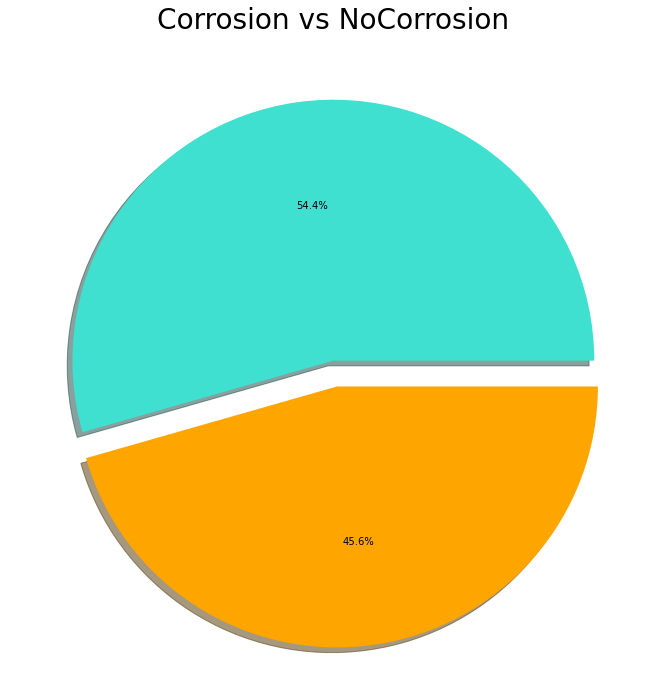

In [8]:
from  matplotlib import cm
figure =plt.figure(figsize=(12,12))
explode = [0, 0.1]
plt.pie(number_classes.values(),explode = explode,autopct = '%3.1f%%',shadow = True, colors = ('turquoise','orange'))
plt.title('Corrosion vs NoCorrosion',fontsize = 28)

# Do Train-Val-Test Split

In [9]:
# Creat folders and subfolders to get a hierarchical file structure
# Create a new folder 'split'
os.mkdir(new_dir)

In [31]:
# Create a subfolder 'train' under the 'split'
train_folder = os.path.join(new_dir, 'train')
# Create subfolders 'train_NORMAL' and 'train_PNEUMONIA' under the 'train'
train_CORROSION = os.path.join(train_folder, 'CORROSION')
train_NOCORROSION = os.path.join(train_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'test' under the 'split'
test_folder = os.path.join(new_dir, 'test')
# Create subfolders 'test_NORMAL' and 'test_PNEUMONIA' under the 'test'
test_CORROSION = os.path.join(test_folder, 'CORROSION')
test_NOCORROSION = os.path.join(test_folder, 'NOCORROSION')
#___________________________________________________________________________
# Create a subfolder 'validation' under the 'split'
val_folder = os.path.join(new_dir, 'validation')
# # Create subfolders 'val_NORMAL' and 'val_PNEUMONIA' under the 'test'
val_CORROSION = os.path.join(val_folder, 'CORROSION')
val_NOCORROSION = os.path.join(val_folder, 'NOCORROSION')

In [32]:
#Use all the path strings to make new directories
os.mkdir(train_folder)
os.mkdir(train_CORROSION)
os.mkdir(train_NOCORROSION)

os.mkdir(test_folder)
os.mkdir(test_CORROSION)
os.mkdir(test_NOCORROSION)

os.mkdir(val_folder)
os.mkdir(val_CORROSION)
os.mkdir(val_NOCORROSION)

In [33]:
# Use a 70%/20%/10% split for train/validation/test
print('Number of images to train')
print('# train_CORROSION: ', round(len(images_CORROSION)*0.7))
print('# train_NOCORROSION: ', round(len(images_NOCORROSION)*0.7))
print('________________________________________________')
print('Number of images to validation')
print('# val_CORROSION: ', round(len(images_CORROSION)*0.2))
print('# val_NOCORROSION: ', round(len(images_NOCORROSION)*0.2))
print('________________________________________________')
print('Number of images to test')
print('# test_CORROSION: ', round(len(images_CORROSION)*0.1))
print('# test_NOCORROSION: ', round(len(images_NOCORROSION)*0.1))

Number of images to train
# train_CORROSION:  693
# train_NOCORROSION:  580
________________________________________________
Number of images to validation
# val_CORROSION:  198
# val_NOCORROSION:  166
________________________________________________
Number of images to test
# test_CORROSION:  99
# test_NOCORROSION:  83


In [34]:
#train CORROSION
imgs = images_CORROSION[:693]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(train_CORROSION, img)
    shutil.copyfile(origin, destination)
# validation CORROSION
imgs = images_CORROSION[693:891]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(val_CORROSION, img)
    shutil.copyfile(origin, destination)
# test CORROSION
imgs = images_CORROSION[891:]
for img in imgs:
    origin = os.path.join(data_CORROSION_dir, img)
    destination = os.path.join(test_CORROSION, img)
    shutil.copyfile(origin, destination)

In [35]:
# train NOCORROSION
imgs = images_NOCORROSION
for img in imgs[:580]:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(train_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# validation NOCORROSION
imgs = images_NOCORROSION[580:746]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(val_NOCORROSION, img)
    shutil.copyfile(origin, destination)
# test NOCORROSION
imgs = images_NOCORROSION[746:]
for img in imgs:
    origin = os.path.join(data_NOCORROSION_dir, img)
    destination = os.path.join(test_NOCORROSION, img)
    shutil.copyfile(origin, destination)

# EDA for Split Data

In [36]:
train_dir = 'split/train'
train_CORROSION_dir = 'split/train/CORROSION/'
train_NOCORROSION_dir = 'split/train/NOCORROSION/'

validation_dir = 'split/validation'
validation_CORROSION_dir = 'split/validation/CORROSION/'
validation_NOCORROSION_dir = 'split/validation/NOCORROSION/'

test_dir = 'split/test'
test_CORROSION_dir = 'split/test/CORROSION/'
test_NOCORROSION_dir = 'split/test/NOCORROSION/'

In [37]:
def num_files_in_direcotry(path):
    num = len([file for file in os.listdir(path) if file.endswith('.jpg')])
    return num

In [38]:
train_CORROSION_num = num_files_in_direcotry(train_CORROSION_dir)
train_NOCORROSION_num = num_files_in_direcotry(train_NOCORROSION_dir)
train_SUM_num = train_CORROSION_num + train_NOCORROSION_num

print("[Train] Number of CORROSION Images: ", train_CORROSION_num)
print("[Train] Number of NOCORROSION Images: ", train_NOCORROSION_num)
print("[Train] Number of TOTAL Images: ", train_SUM_num)

[Train] Number of CORROSION Images:  693
[Train] Number of NOCORROSION Images:  580
[Train] Number of TOTAL Images:  1273


In [39]:
val_CORROSION_num = num_files_in_direcotry(validation_CORROSION_dir)
val_NOCORROSION_num = num_files_in_direcotry(validation_NOCORROSION_dir)
val_SUM_num = val_CORROSION_num + val_NOCORROSION_num

print("[Validation] Number of CORROSION Images: ", val_CORROSION_num)
print("[Validation] Number of NOCORROSION Images: ", val_NOCORROSION_num)
print("[Validation] Number of TOTAL Images: ", val_SUM_num)

[Validation] Number of CORROSION Images:  198
[Validation] Number of NOCORROSION Images:  166
[Validation] Number of TOTAL Images:  364


In [40]:
test_CORROSION_num = num_files_in_direcotry(test_CORROSION_dir)
test_NOCORROSION_num = num_files_in_direcotry(test_NOCORROSION_dir)
test_SUM_num = test_CORROSION_num + test_NOCORROSION_num

print("[test] Number of CORROSION Images: ", test_CORROSION_num)
print("[test] Number of NOCORROSION Images: ", test_NOCORROSION_num)
print("[test] Number of TOTAL Images: ", test_SUM_num)

[test] Number of CORROSION Images:  99
[test] Number of NOCORROSION Images:  83
[test] Number of TOTAL Images:  182


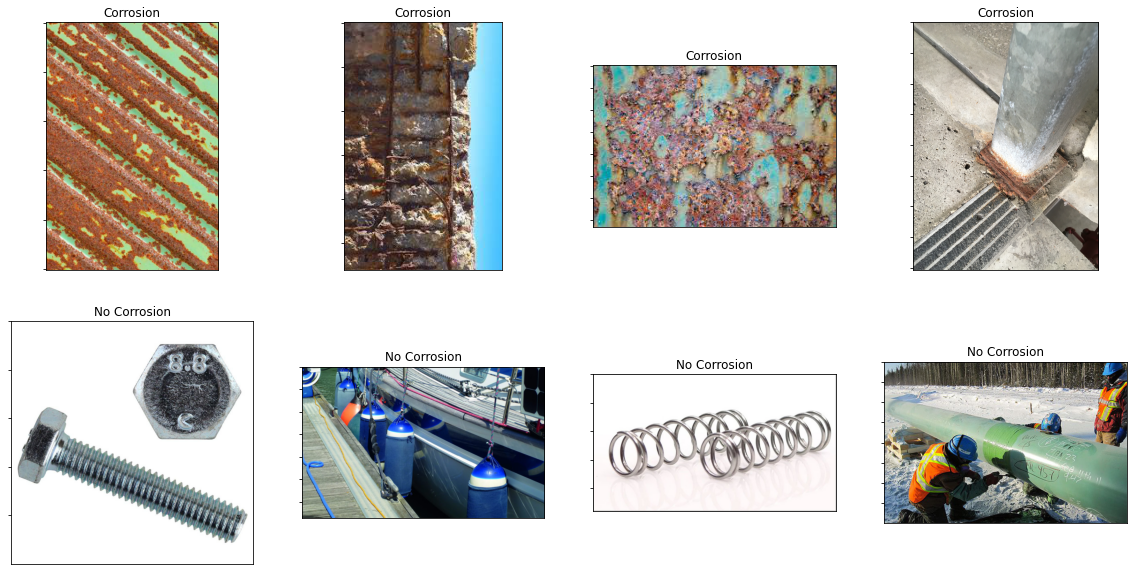

In [41]:
# Plot CORROSION and NOCORROSION in new training dataset
plt.figure(figsize = (20,10))
num_imgs_1 = 4
for index in range(num_imgs_1):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + train_corrosion_pic_name
#    fig, ax_list = plt.sunplots(nrows = 2, ncols =4)
    plt.subplot(2, num_imgs_1, index + 1)
    plt.imshow(Image.open(train_corrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('Corrosion')

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + train_nocorrosion_pic_name

    plt.subplot(2, num_imgs_1, index + num_imgs_1 + 1)
    plt.imshow(Image.open(train_nocorrosion_pic_address))
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, labelleft=False)
    plt.title('No Corrosion')

In [42]:
# Check New traning dataset images sizes
num_imgs_2 = 15
for index in range(num_imgs_2):
    train_corrosion_pic_name = os.listdir(train_CORROSION_dir)[index]
    train_corrosion_pic_address = train_CORROSION_dir + train_corrosion_pic_name
    train_corrosion_image = Image.open(train_corrosion_pic_address)
    train_corrosion_width, train_corrosion_height = train_corrosion_image.size
    print('train_CORROSION_image', index + 1, ":" , train_corrosion_width, 'x', train_corrosion_height)

    train_nocorrosion_pic_name = os.listdir(train_NOCORROSION_dir)[index]
    train_nocorrosion_pic_address = train_NOCORROSION_dir + train_nocorrosion_pic_name
    train_nocorrosion_image = Image.open(train_nocorrosion_pic_address)
    train_nocorrosion_width, train_nocorrosion_height = train_nocorrosion_image.size
    print('train_NOCORROSION_image', index + 1, ":" , train_nocorrosion_width, 'x', train_nocorrosion_height)
    print('\n')

# All images are in different sizes

train_CORROSION_image 1 : 700 x 1003
train_NOCORROSION_image 1 : 1000 x 1000


train_CORROSION_image 2 : 179 x 281
train_NOCORROSION_image 2 : 1080 x 675


train_CORROSION_image 3 : 275 x 183
train_NOCORROSION_image 3 : 855 x 481


train_CORROSION_image 4 : 3024 x 4032
train_NOCORROSION_image 4 : 600 x 400


train_CORROSION_image 5 : 3024 x 4032
train_NOCORROSION_image 5 : 1024 x 636


train_CORROSION_image 6 : 370 x 278
train_NOCORROSION_image 6 : 1000 x 640


train_CORROSION_image 7 : 641 x 527
train_NOCORROSION_image 7 : 225 x 225


train_CORROSION_image 8 : 329 x 153
train_NOCORROSION_image 8 : 2400 x 1440


train_CORROSION_image 9 : 259 x 194
train_NOCORROSION_image 9 : 224 x 225


train_CORROSION_image 10 : 950 x 634
train_NOCORROSION_image 10 : 600 x 315


train_CORROSION_image 11 : 3024 x 3024
train_NOCORROSION_image 11 : 700 x 700


train_CORROSION_image 12 : 1300 x 1300
train_NOCORROSION_image 12 : 725 x 364


train_CORROSION_image 13 : 3024 x 3024
train_NOCORROSION_image 13 